In [1]:
pip install nltk

In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\naamale\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [10]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection',encoding="utf8")]
#.rstrip() method takes off the \n at the end of a line
# open('...') - is the location of the sms spam collection file

In [12]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
# printing the first ten messages with enumerate to check the style
for mess_no, message in enumerate(messages[:10]): 
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

# The Data:
what we learn from the styling of the file:
* this is a tsv file - tab separated values. where the first tab is an indicator, a label, of either spam or ham SMS. and the second tab is the message itself.


In [16]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
import pandas as pd

In [18]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t', 
                       names = ['label', 'message']) #name - column names

In [19]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


two unique labels and 5169 unique messages, vs. 5572 messages in total. which means there are some repetitions. (probably short SMS like "hi", "yes", "no" etc).

In [21]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [22]:
messages['length'] = messages['message'].apply(len)

In [23]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

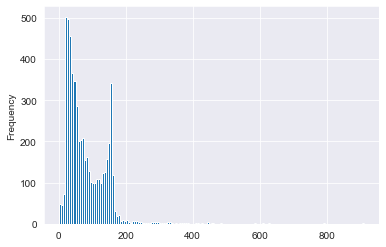

In [28]:
sns.set_style('darkgrid')
messages['length'].plot.hist(bins = 150)

we can see that most messages are as long as 200 spots. and the length of the messages behave as a saddle...AND there are some REALLY long messages as 1000 characters

In [29]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

MAX CHARACTERS: 910!

In [32]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

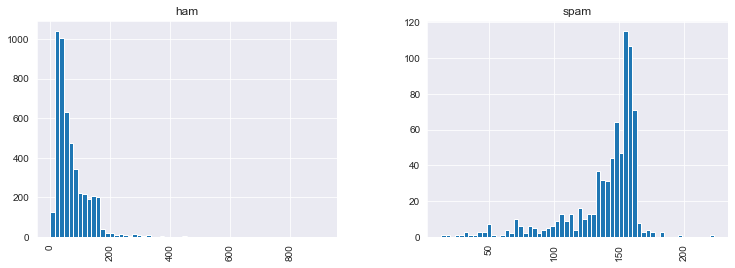

In [33]:
#creating a facet grid right of Pandas DataFrame, without Seaborn
messages.hist(column = 'length', by = 'label', bins = 60, figsize = (12,4))



Spam SMS tend to be around the 50 chars

Ham SMS tend to be around the 150 chars

it look like length is a good figure to distinguish between ham and spam SMS

## ML
all machine learning algorithms need some sort of numerical features. 

and right now, all we have is data in the form of text. So we need to create numerical features in order to portray the data and to make assumptions about it.

now we're going to convert the raw messages into sequence of words, a vector of word count

we're also going to reamove common words as "a", "the", "if"... etc. also known as stop words. This is where we're going to use nltk library.

In [36]:
import string

In [45]:
mess = 'Sample message! Notice: it has punctuation.'

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
nopunct = [c for c in mess if c not in string.punctuation]

In [48]:
nopunct

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [49]:
from nltk.corpus import stopwords

In [50]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
nopunct = ''.join(nopunct)

In [52]:
nopunct

'Sample message Notice it has punctuation'

In [53]:
nopunct.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [54]:
clean_mess = [word for word in nopunct.split() if word.lower() not in stopwords.words('english')]

In [55]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [56]:
# now we're going to put all of this together in a function
def text_process(mess):
    """
    1. remove punctuation
    2. remove stopwords
    3. return a list of clean text words
    """
    
    nopunct = [c for c in mess if c not in string.punctuation]
    nopunct = ''.join(nopunct)
    clean_mess = [word for word in nopunct.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [57]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Tokenize
we're going to tokenize these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

this is also called text normalization

In [59]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and soit's better to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will focus on using what we have to convert our list of words to an actual **vector** that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
#bow - short for bag of words
#we're fitting the CountVectorizer to all of our messages.
# it may take a while
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message']) #there are many features for this CountVectorizer, we'll use our own function

In [99]:
print(type(bow_transformer))

<class 'sklearn.feature_extraction.text.CountVectorizer'>


this will create a very large 'list' (an object of class CountVectorizer) of all words of all messages
# using .vocabulary_

In [62]:
print(len(bow_transformer.vocabulary_)) #this will print the total count of all words in all the SMSs

11425


In [63]:
mess4 = messages['message'][3]

In [64]:
print(mess4)

U dun say so early hor... U c already then say...


# extracting token count with .transform()
Extract token counts out of raw text documents using the vocabulary
fitted with fit or the one provided to the constructor.

In [65]:
bow4 = bow_transformer.transform([mess4]) 

In [101]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [102]:
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [67]:
print(bow4.shape)

(1, 11425)


only seven uniqe words in that message, and two of them repeat twice

___
# using .get_feature_name()

In [69]:
bow_transformer.get_feature_names()[4068]

'U'

In [70]:
bow_transformer.get_feature_names()[9554]

'say'

# creating the Sparse Matrix of the entire SMS corpus

until now we only created a token count for a particular sms with the .transform() method. 
and before that we only fitted our bag of words with all the sms, we still did not make the sparse matrix for the entire corpus via our bow. a short arranger:

1. first we created the CountVector with the analyzer, and fitted all the massages: 
    bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
2. called the vocabulary: bow_transformer.vocabulary_
3. created a sparse matrix for a specific sms with calling:  bow_transformer.transform('that sms')

now we're using the .transform() method to create the sparse matrix of the entire sms corpus by:

In [71]:
messages_bow = bow_transformer.transform(messages['message'])

this may take time - now we're creating the sparse matrix!

In [73]:
print('Shape of the Sparse Matrix is: ', messages_bow.shape)

Shape of the Sparse Matrix is:  (5572, 11425)


In [74]:
messages_bow.nnz #nnz - non zero ocurrances

50548

and we can also collect the sparsity of the matrix by using:

In [76]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [82]:
tfidf4 = tfidf_transformer.transform(bow4) #specifically to an incident sms

In [86]:
print(tfidf4) #prints the weight value of each of the words in the 4th sms

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


We'll go ahead and check what is the IDF (inverse document frequency) of the word "u" and of word "university"?

In [85]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']] #the idf of 'university'

8.527076498901426

In [87]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']] #the idf of 'university'

3.2800524267409408

To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [88]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline".

## Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
# we're creating an instance of Naive Bayes, and fitting
# it with the normalized bow, and the two categories
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [91]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [92]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [93]:
messages['label'][3]

'ham'

we can see that our model detected correctly this message as ham

In [96]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [94]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [95]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

we trained the model on the entire data this is usually not a good thing to do

we should split out data - on train and test. lets do that

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

it's just the sms no bag of words, tokinizing and normalizing etc...

one way is to go all over again for the train and test data.

another way to go through this is to use sklearn Pipelines  - and to go through all over the process really quickly by passing in tuples that go from one step to the other, as follows:

In [105]:
from sklearn.pipeline import Pipeline

In [109]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [110]:
pipeline.fit(X=msg_train, y=label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000234B4C29A60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [111]:
predictions = pipeline.predict(msg_test)

In [112]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1456
        spam       1.00      0.69      0.82       216

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [120]:
pipeline2.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000234B4C29A60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [122]:
predictions2 = pipeline2.predict(msg_test)

In [123]:
print(classification_report(label_test, predictions2))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1456
        spam       1.00      0.80      0.89       216

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672



as we can see, the random forest did a little better than the naive bayse classifier

___
# Q&A:

## Q: 
Is there any real world advantage/disadvantage in applying a .lower()  function to the entire corpus, instead of using the .lower()  when checking words during the if  statement?  For example, if we look at a message that contains the word, "FREE" our brain intuitively thinks it's spam. Whereas seeing the word "free" would have a lesser effect. But I'm not sure how these algorithms react to capitalization.

I'm assuming techniques like stemming would make capitalization useless as well.

# A:
That is very good point! If you wanted to explore this more, you would then maybe use feature engineering to create new features based on capitalization, as you mentioned FREE is probably more indicative of spam. For this simple project its not  a huge game changer, but its still a good idea

# Q:
Thanks Jose. 

I'm a bit confused. When we actually created the following pipeline:  CountVectorizer()  -> TfidfTransformer()  -> MultinomialNB() , I noticed that we didn't actually use the feature we created, 'text length' in the pipeline. We just fed it our text and labels. 

 In NLP, is the feature engineering primarily performed during the creation of our custom CountVectorizer()  analyzer method?
 
# A:
I will have to look into again, probably just forgot to pass in that column, although definitely the "heavy lifting" is done by the vectorization. **not really an answer though **

# Q:
Thinking about it more, when we call the CountVectorizer() , it’s basically just creating a 2D matrix of all the messages and every word in the corpus (like a bag of words). So there is no way to pass in the created text length  feature through it, correct? So I wonder where and how we could use that feature.

I’m also curious to find out whether CountVectorizer()  treats “free” and “FREE” as one or two separate words. I’m going to research this topic.

With that said, the NLP section was great and well explained. I went ahead and started to read the NLP book as well.


# GO AND READ!